<a href="https://colab.research.google.com/github/Reactodactyl/MovLensDataSet/blob/main/Recommender_Systems_Final_Projectg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup

In [60]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "recommender_sys_proj"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading The Data


![picture](https://drive.google.com/uc?export=view&id=1gIHAyThFFxwKwLl4kFTVeoE51Ig4pcTx)

In [61]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("ml-100k/u.data", sep = '\t', header = None, names=rating_header)

In [62]:
rating.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [63]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [64]:
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("ml-100k/u.user", sep = '|', header = None, names=user_header)

In [65]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [66]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [67]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [68]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [69]:
# remove the video release date (no values)
movies = movies.drop(columns=['video_release_date'])
movies.head()

,item_id,title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [70]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   item_id       1682 non-null   int64 
 1   title         1682 non-null   object
 2   release_date  1681 non-null   object
 3   IMDb_URL      1679 non-null   object
 4   unknown       1682 non-null   int64 
 5   Action        1682 non-null   int64 
 6   Adventure     1682 non-null   int64 
 7   Animation     1682 non-null   int64 
 8   Children's    1682 non-null   int64 
 9   Comedy        1682 non-null   int64 
 10  Crime         1682 non-null   int64 
 11  Documentary   1682 non-null   int64 
 12  Drama         1682 non-null   int64 
 13  Fantasy       1682 non-null   int64 
 14  Film-Noir     1682 non-null   int64 
 15  Horror        1682 non-null   int64 
 16  Musical       1682 non-null   int64 
 17  Mystery       1682 non-null   int64 
 18  Romance       1682 non-null   int64 
 19  Sci-Fi

# Data Transformation & Combination

In [71]:
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [72]:
occupation = pd.read_csv("ml-100k/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [108]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False)
temp = rating[["item_id","rating"]].groupby(by=['item_id']).count().reset_index()
average_rating["How many times"] = temp["rating"]
average_rating

,item_id,rating,How many times
0,1,3.878319,452
1,2,3.206107,131
2,3,3.033333,90
3,4,3.550239,209
4,5,3.302326,86
...,...,...,...
1677,1678,1.000000,1
1678,1679,3.000000,1
1679,1680,2.000000,1
1680,1681,3.000000,1


In [ ]:
# merge two dataframes (average_rating and movies)
pd.merge(average_rating, movies[["item_id", "title"]])

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


# Analyze The Data

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

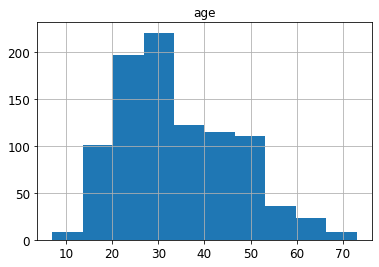

In [ ]:
# age intervals distrubution
users.hist(column="age")
#users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#users["age_category"].hist()

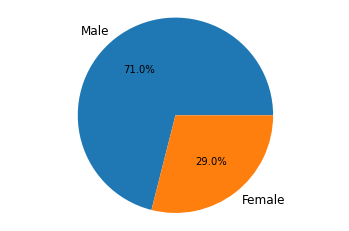

In [ ]:
temp = users.groupby('gender')
plt.pie([temp.get_group("M").size,temp.get_group("F").size],labels=["Male","Female"],autopct='%1.1f%%')
plt.axis("equal")
plt.show()

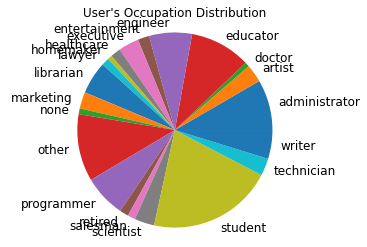

In [ ]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

In [ ]:
# #Grouping by Zip_Code
# citylist = pd.read_html("https://www.zipcode.com.ng/2022/06/list-of-5-digit-zip-codes-united-states.html")
# citylist = pd.concat([citylist[1],citylist[3]]) #append to the list since we have 4 tables inside the results
# citylist = citylist.reset_index()
# temp = users.copy()

# #Changing to integer for convenience
# #For temp
# for i in range(len(temp)):
#     if (temp["zip_code"][i].isdigit()):
#         temp["zip_code"][i] = int(temp["zip_code"][i])
#     else:
#         temp["zip_code"][i] = 99999

# #For Citylist
# for i in range(len(citylist)):
#     if(citylist["ZIP Code"].map(lambda x: int(x[0:5]))[i]):
#         citylist["Zip1"] = citylist["ZIP Code"].map(lambda x: int(x[0:5]))
# for i in range(len(citylist)):
#     if(i!=50):
#         citylist["Zip2"] = citylist["ZIP Code"].map(lambda x: int(x[9:]) if x[9:] != '' else None)

# temp["City"] = "" #Create a new table member

# #Start working with the data by naming the city
# for i in range(0,len(temp)):
#     for j in range(0,len(citylist)):
#         if(temp["zip_code"][i]==99999):
#             temp["City"][i]="OO"
#             continue
#         elif(temp["zip_code"][i]>=citylist["Zip1"][j] and temp["zip_code"][i]<=citylist["Zip2"][j]):
#             temp["City"][i]=citylist["USPS"][j]
#             continue
# print(citylist)
# print(temp)


C:\Users\steve\AppData\Local\Temp\ipykernel_6516\2603995410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["zip_code"][i] = int(temp["zip_code"][i])
C:\Users\steve\AppData\Local\Temp\ipykernel_6516\2603995410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["zip_code"][i] = 99999
C:\Users\steve\AppData\Local\Temp\ipykernel_6516\2603995410.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["City"][i]=citylist[

    index USPS           State        ZIP Code   State Capital  \
0       0   AL         Alabama  35004 to 36925      Montgomery   
1       1   AK          Alaska  99501 to 99950          Juneau   
2       2   AZ         Arizona  85001 to 86556         Phoenix   
3       3   AR        Arkansas  71601 to 72959     Little Rock   
4       4   CA      California  90001 to 96162      Sacramento   
5       5   CO        Colorado  80001 to 81658          Denver   
6       6   CT     Connecticut  06001 to 06928        Hartford   
7       7   DE        Delaware  19701 to 19980           Dover   
8       8   FL         Florida  32003 to 34997     Tallahassee   
9       9   GA         Georgia  30002 to 39901         Atlanta   
10     10   HI          Hawaii  96701 to 96898        Honolulu   
11     11   ID           Idaho  83201 to 83877           Boise   
12     12   IL        Illinois  60001 to 62999     Springfield   
13     13   IN         Indiana  46001 to 47997    Indianapolis   
14     14 

# Analyze Movie Data

In [ ]:
genre = pd.read_csv("ml-100k/u.genre", sep = '|', header = None)
genre_list = genre[0].values
movie_set_genre = movies[genre_list]

In [ ]:
from sklearn.cluster import KMeans
k = 50
kmeans = KMeans(n_clusters=k)
kmeans.fit_predict(movie_set_genre)

array([ 2,  3, 10, ..., 19,  5,  1])

In [ ]:
kmeans.inertia_

306.95507888543244

In [116]:
import scipy.spatial.distance as sp_dist
genre_array = movie_set_genre.to_numpy()

print(genre_array.shape)

x = genre_array[0]
y = genre_array[1]
print(x)
print(y)
print(sp_dist.cosine(x,y))
print(sp_dist.euclidean(x,y))
print(sp_dist.jaccard(x,y))

(1682, 19)
[0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
1.0
2.449489742783178
1.0


In [115]:
# compute the matrix of all pairwise distances of movies
import sklearn.metrics as metrics

distance_matrix = metrics.pairwise_distances(genre_array,metric = 'jaccard') # ‘cosine’, ‘euclidean’, etc
print(distance_matrix.shape)
print(distance_matrix)

(1682, 1682)
[[0.         1.         1.         ... 1.         0.42264973 1.        ]
 [1.         0.         0.42264973 ... 1.         1.         1.        ]
 [1.         0.42264973 0.         ... 1.         1.         1.        ]
 ...
 [1.         1.         1.         ... 0.         1.         0.29289322]
 [0.42264973 1.         1.         ... 1.         0.         1.        ]
 [1.         1.         1.         ... 0.29289322 1.         0.        ]]
